# Differencial equations

## Numerical integration

This part cover the chapter 1.8 page 36 to 52 of the book "Orbital mechanics for Engineering Students" (ISBN: 978-0-08-097747-a)

In the book the presented example is a system with a masse, a string and a damper. 

The equation of the model is the following:
$$ \ddot{x} + 2\zeta \omega_n\dot{x} + \omega_n^2 x = \frac{F(t)}{m} $$
$F(t)$ is a sinusoidal force of an amplitufe of $F_0$ and a circular frequency of $\omega$.

The solution of this differential equation is:
$$ x = e^{-\zeta \omega_n t} (A\sin{\omega_d t}+ B\cos{\omega_d t})
    + \frac{F_0/m}{(\omega_n^2 - \omega^2)^2 + (2\omega \omega_n \zeta)^2}
    [(\omega_n^2 - \omega^2)\sin{\omega t} - 2 \omega \omega_n \zeta \cos{\omega t}]$$
With
$$ A = \zeta \frac{\omega_n}{\omega_d} x_0 + \frac{\dot{x}_0}{\omega_d}
    + \frac{\omega^2 + (2\zeta^2 - 1)\omega_n^2}
           {(\omega_n^2 - \omega^2)^2 + (2\omega\omega_n \zeta)^2}
    \frac{\omega}{\omega_d}
    \frac{F_0}{m}$$
and
$$ B = x_0 + \frac{2 \omega \omega_n \zeta}{(\omega_n^2 - \omega^2)^2 + (2 \omega \omega_n \zeta)^2}
        \frac{F_0}{m}$$
with $ \omega_d = \omega_n \sqrt{1-\zeta^2}$

### Example

Example for t=0 to t=110

$ m = 1 kg$

$\omega_n = 1 rad/s $

$\zeta = 0.03 $

$F_0 = 1N $

$\omega = 0.4 rad/s $

and for initial condition $x = \dot{x} =0 $

Representation with Python

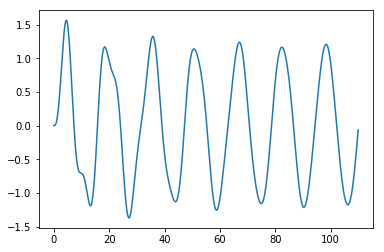

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

def general_x(t, x_0, xdot_0,  m, zeta, omega_n, omega, F_0):
    omega_d = omega_n * math.sqrt(1-zeta**2)
    
    A = zeta*(omega_n/omega_d)*x_0 + xdot_0 / omega_d \
    + (omega**2 + (2*zeta**2 - 1)*omega_n**2) / (((omega_n**2 - omega**2)**2 + (2*omega*omega_n*zeta)**2)) \
    * (omega / omega_d) * (F_0 / m)
    
    B = x_0 + ((2*omega*omega_n*zeta) / (((omega_n**2 - omega**2)**2 + (2*omega*omega_n*zeta)**2))) * (F_0 / m)
    
    y = math.exp(-zeta * omega_n * t)*(A*math.sin(omega_d*t) + B*math.cos(omega_d*t)) \
        + ((F_0 / m)/((omega_n**2 - omega**2)**2 + (2*omega*omega_n*zeta)**2)) \
        * ((omega_n**2 - omega**2) * math.sin(omega*t) - (2*omega*omega_n*zeta*math.cos(omega*t)))
    return y

def x(t=0):
    x_0 = 0
    xdot_0 = 0
    m = 1
    zeta = 0.03
    omega = 0.4
    omega_n = 1
    F_0 = 1
    
    return general_x(t, x_0, xdot_0,  m, zeta, omega_n, omega, F_0)

t0 = 0.0
t_end = 110.0
step = 0.1

y = []

# evenly sampled time at 200ms intervals
t = np.arange(t0, t_end, step)

for i in t:
    y.append(x(i))

# red dashes, blue squares and green triangles
plt.plot(t, y)
plt.show()